C:\Users\ASUS\AppData\Local\Temp\ipykernel_14096\2977919272.py:15: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['Time'] = pd.to_datetime(merged_df['Time'])  # Convert Time column to datetime
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14096\2977919272.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_cleaned = merged_df_cleaned.fillna(method="ffill").fillna(method="bfill")


Correlation Analysis:
                FW_OUT_FM02_m3h  BRINE_OUT_FM03_m3h  PowerCenter_Out_FM04_m3h
ROT1_deg              0.177974            0.226404                  0.211583
ROT2_deg              0.141894            0.192172                  0.174500
ROT3_deg              0.145037            0.195468                  0.177776
MRU_Surge_m           0.075182            0.067797                  0.059896
MRU_Sway_m           -0.020420           -0.010066                  0.001502
MRU_Heave_m          -0.078905           -0.077223                 -0.077734
MRU_Yaw_deg2          0.374709            0.418903                  0.425145
MRU_Pitch_deg        -0.059006           -0.060945                 -0.060851
MRU_Roll_deg         -0.120236           -0.116979                 -0.116820
theta1                0.001126            0.056527                  0.027916
theta2               -0.386572           -0.402959                 -0.415235
theta3                0.204838            0.155525   

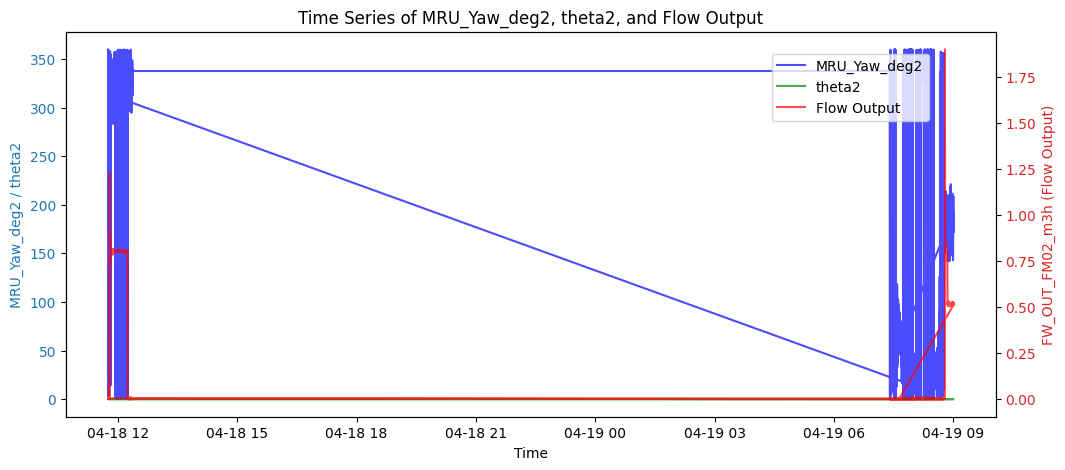

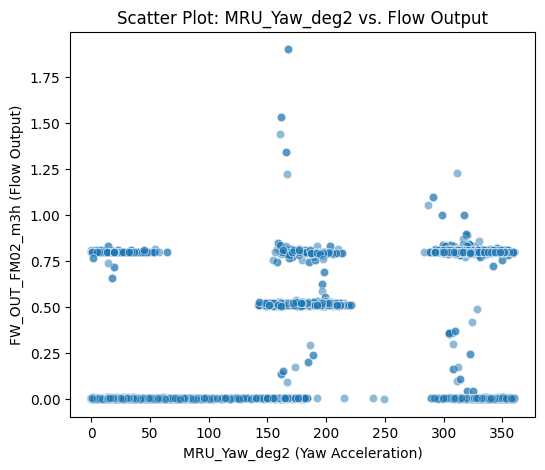

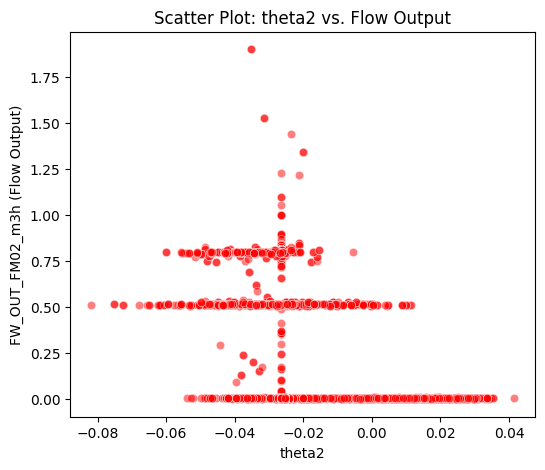

                            OLS Regression Results                            
Dep. Variable:        FW_OUT_FM02_m3h   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     636.4
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:44:08   Log-Likelihood:                -1397.0
No. Observations:                7200   AIC:                             2806.
Df Residuals:                    7194   BIC:                             2847.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4406      0.069    -21.026   

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load CSV files
file1 = r"C:\Users\ASUS\Downloads\Desalination_1Hz 19-04-2024 8.00.02.csv"
file2 = r"C:\Users\ASUS\Downloads\Desalination_1Hz 19-04-2024 9.00.00.csv"
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Merge Data
merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df['Time'] = pd.to_datetime(merged_df['Time'])  # Convert Time column to datetime

# Drop columns with excessive missing values
merged_df_cleaned = merged_df.drop(columns=["PowerCenter_RPM", "Roboteq_Current_A", "Roboteq_Voltage_V"], errors='ignore')

# Fill missing values using forward-fill and backward-fill
merged_df_cleaned = merged_df_cleaned.fillna(method="ffill").fillna(method="bfill")

# Define movement-related and flow output columns
movement_cols = ["ROT1_deg", "ROT2_deg", "ROT3_deg", "MRU_Surge_m", "MRU_Sway_m", "MRU_Heave_m",
                 "MRU_Yaw_deg2", "MRU_Pitch_deg", "MRU_Roll_deg", "theta1", "theta2", "theta3"]
flow_output_cols = ["FW_OUT_FM02_m3h", "BRINE_OUT_FM03_m3h", "PowerCenter_Out_FM04_m3h"]

# Compute correlation matrix
correlation_matrix = merged_df_cleaned[movement_cols + flow_output_cols].corr()
correlation_results = correlation_matrix.loc[movement_cols, flow_output_cols]
print("Correlation Analysis:\n", correlation_results)

# Time Series Visualization
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_xlabel("Time")
ax1.set_ylabel("MRU_Yaw_deg2 / theta2", color="tab:blue")
ax1.plot(merged_df_cleaned["Time"], merged_df_cleaned["MRU_Yaw_deg2"], label="MRU_Yaw_deg2", color="blue", alpha=0.7)
ax1.plot(merged_df_cleaned["Time"], merged_df_cleaned["theta2"], label="theta2", color="green", alpha=0.7)
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax2 = ax1.twinx()
ax2.set_ylabel("FW_OUT_FM02_m3h (Flow Output)", color="tab:red")
ax2.plot(merged_df_cleaned["Time"], merged_df_cleaned["FW_OUT_FM02_m3h"], label="Flow Output", color="red", alpha=0.7)
ax2.tick_params(axis="y", labelcolor="tab:red")
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))
plt.title("Time Series of MRU_Yaw_deg2, theta2, and Flow Output")
plt.show()

# Scatter Plots
plt.figure(figsize=(6, 5))
sns.scatterplot(x=merged_df_cleaned["MRU_Yaw_deg2"], y=merged_df_cleaned["FW_OUT_FM02_m3h"], alpha=0.5)
plt.xlabel("MRU_Yaw_deg2 (Yaw Acceleration)")
plt.ylabel("FW_OUT_FM02_m3h (Flow Output)")
plt.title("Scatter Plot: MRU_Yaw_deg2 vs. Flow Output")
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(x=merged_df_cleaned["theta2"], y=merged_df_cleaned["FW_OUT_FM02_m3h"], alpha=0.5, color="red")
plt.xlabel("theta2")
plt.ylabel("FW_OUT_FM02_m3h (Flow Output)")
plt.title("Scatter Plot: theta2 vs. Flow Output")
plt.show()

# Regression Analysis
X = merged_df_cleaned[["MRU_Yaw_deg2", "theta2", "ROT1_deg", "ROT2_deg", "ROT3_deg"]]
y = merged_df_cleaned["FW_OUT_FM02_m3h"]
X = sm.add_constant(X)  # Add intercept term
model = sm.OLS(y, X).fit()
print(model.summary())


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14096\3202110171.py:12: SyntaxWarning: invalid escape sequence '\s'
  file_paths = ["D:\sprint(main)\ml task\Desalination_1Hz 19-04-2024 8.00.02.csv",
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14096\3202110171.py:13: SyntaxWarning: invalid escape sequence '\s'
  "D:\sprint(main)\ml task\Desalination_1Hz 19-04-2024 9.00.00.csv"]  # Add more if needed



Spearman Correlation with Flow Output:
 MRU_Yaw_deg2    0.188381
theta2          0.080154
ROT1_deg        0.377277
ROT2_deg        0.365082
ROT3_deg        0.368864
Name: FW_OUT_FM02_m3h, dtype: float64

Kendall Correlation with Flow Output:
 MRU_Yaw_deg2    0.127566
theta2          0.065491
ROT1_deg        0.321525
ROT2_deg        0.300921
ROT3_deg        0.305411
Name: FW_OUT_FM02_m3h, dtype: float64

Polynomial Regression R² Score: 0.092

Random Forest R² Score: 0.270
Random Forest MSE: 0.058

Feature Importance (Higher = More Impact on Flow Output):
 MRU_Yaw_deg2    0.832891
theta2          0.062452
ROT2_deg        0.047783
ROT1_deg        0.034685
ROT3_deg        0.022189
dtype: float64


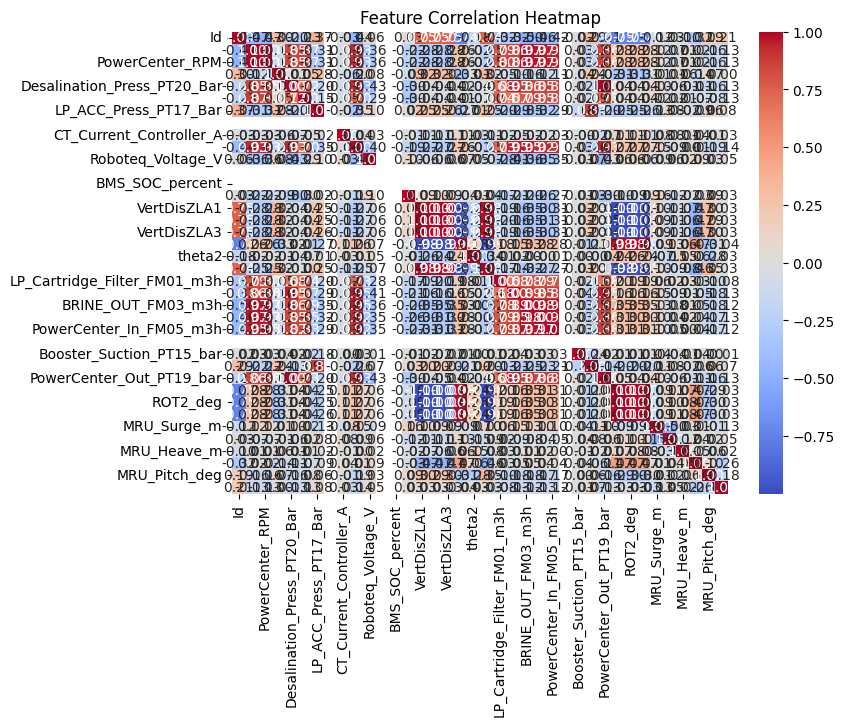

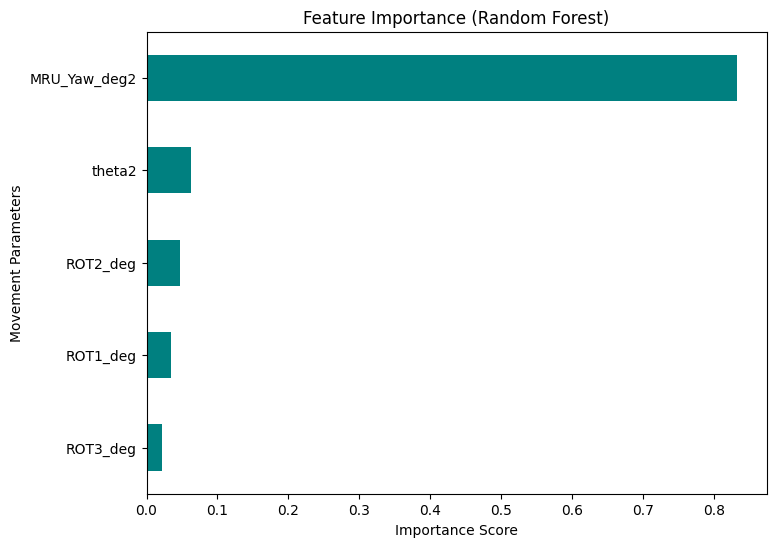

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# -------------------- 1. Load & Merge Multiple CSV Files --------------------
file_paths = ["D:\sprint(main)\ml task\Desalination_1Hz 19-04-2024 8.00.02.csv", 
              "D:\sprint(main)\ml task\Desalination_1Hz 19-04-2024 9.00.00.csv"]  # Add more if needed

# Read all CSVs and concatenate them into a single DataFrame
df_list = [pd.read_csv(file) for file in file_paths]
df_combined = pd.concat(df_list, ignore_index=True)

# Drop non-numeric columns (e.g., timestamps, string columns)
df_cleaned = df_combined.select_dtypes(include=[np.number]).dropna()

# Define movement-related columns (input features)
movement_cols = ["MRU_Yaw_deg2", "theta2", "ROT1_deg", "ROT2_deg", "ROT3_deg"]

# Define flow output column (target variable)
flow_output_col = "FW_OUT_FM02_m3h"

# Ensure selected columns exist in cleaned dataset
movement_cols = [col for col in movement_cols if col in df_cleaned.columns]

# Extract features and target variable
X = df_cleaned[movement_cols]
y = df_cleaned[flow_output_col]

# -------------------- 2. Compute Correlations --------------------
spearman_corr = df_cleaned.corr(method="spearman")
kendall_corr = df_cleaned.corr(method="kendall")

spearman_results = spearman_corr.loc[movement_cols, flow_output_col]
kendall_results = kendall_corr.loc[movement_cols, flow_output_col]

print("\nSpearman Correlation with Flow Output:\n", spearman_results)
print("\nKendall Correlation with Flow Output:\n", kendall_results)

# -------------------- 3. Polynomial Regression --------------------
poly = PolynomialFeatures(degree=2)  # Quadratic polynomial
X_poly = poly.fit_transform(X)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predictions
y_poly_pred = poly_model.predict(X_poly)
r2_poly = r2_score(y, y_poly_pred)
print(f"\nPolynomial Regression R² Score: {r2_poly:.3f}")

# -------------------- 4. Random Forest Regression --------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_rf_pred = rf_model.predict(X_test)

# Model performance
r2_rf = r2_score(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
print(f"\nRandom Forest R² Score: {r2_rf:.3f}")
print(f"Random Forest MSE: {mse_rf:.3f}")

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nFeature Importance (Higher = More Impact on Flow Output):\n", feature_importance.sort_values(ascending=False))

# -------------------- 5. Visualization --------------------
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Importance Plot
plt.figure(figsize=(8,6))
feature_importance.sort_values().plot(kind="barh", color="teal")
plt.xlabel("Importance Score")
plt.ylabel("Movement Parameters")
plt.title("Feature Importance (Random Forest)")
plt.show()
